In [1]:
import cv2
import numpy as np
from skimage import color
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
import pywt
import time
start = time.time()

In [2]:
# Convert image to Lab color space
def convert_rgb_to_lab(image):
    return color.rgb2lab(image)

# Convert Lab back to RGB
def convert_lab_to_rgb(image):
    return color.lab2rgb(image)

# Calculate the mean and standard deviation for each channel in Lab space
def get_mean_std(image_lab):
    image_mean = np.mean(image_lab, axis=(0, 1))
    image_std = np.std(image_lab, axis=(0, 1))
    return image_mean, image_std

# Apply Reinhard normalization
def reinhard_normalization(source_image, target_image):
    # Convert source and target images from RGB to Lab color space
    source_lab = convert_rgb_to_lab(source_image)
    target_lab = convert_rgb_to_lab(target_image)
    
    # Get the mean and standard deviation for each image in Lab space
    source_mean, source_std = get_mean_std(source_lab)
    target_mean, target_std = get_mean_std(target_lab)
    
    # Normalize the source image to match the target image
    norm_lab = (source_lab - source_mean) / source_std * target_std + target_mean
    
    # Convert normalized image back to RGB
    norm_rgb = convert_lab_to_rgb(norm_lab)
    
    # Clip pixel values to be in the valid range [0, 1]
    norm_rgb = np.clip(norm_rgb, 0, 1)
    
    # Convert to uint8 format for saving or displaying (scale back to [0, 255])
    norm_rgb_uint8 = (norm_rgb * 255).astype(np.uint8)
    
    return norm_rgb_uint8

In [3]:
# Load source and target images
source_image_path = 'source.jpg' 
target_image_path = 'target.jpg' 

source_image = cv2.imread(source_image_path)
target_image = cv2.imread(target_image_path)

# Error handling if images are not loaded correctly
if source_image is None or target_image is None:
    raise ValueError("Check the image paths, one or both images could not be loaded.")

# Convert BGR to RGB for proper color handling
source_image_rgb = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB)
target_image_rgb = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)

# Apply Reinhard normalization
normalized_image = reinhard_normalization(source_image_rgb, target_image_rgb)

# Convert the normalized image back to BGR for OpenCV
normalized_image_bgr = cv2.cvtColor(normalized_image, cv2.COLOR_RGB2BGR)

# Save the normalized image
cv2.imwrite('normalized_image.jpg', normalized_image_bgr)


True

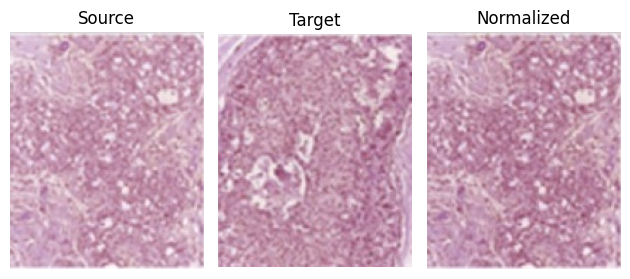

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(source_image)
ax[0].set_title('Source')
ax[0].axis('off')

ax[1].imshow(target_image)
ax[1].set_title('Target')
ax[1].axis('off')

ax[2].imshow(normalized_image_bgr)
ax[2].set_title('Normalized')
ax[2].axis('off')

fig.tight_layout()

plt.show()

In [5]:
end = time.time()

print(end - start)

0.35387253761291504
